In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

##  Gradient Boosting Regression

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df = pd.get_dummies(df, columns=['sex', 'smoker','region'], dtype=int)

In [5]:
x = df.drop(columns=['charges'])
y = df['charges']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((936, 11), (402, 11), (936,), (402,))

In [15]:
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=.1,
    max_depth=3,
    random_state=42
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nr2 score: ', r2_score(y_test, y_pred))

print('MSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))


r2 score:  0.8674396474621758
MSE:  4408.692543720851


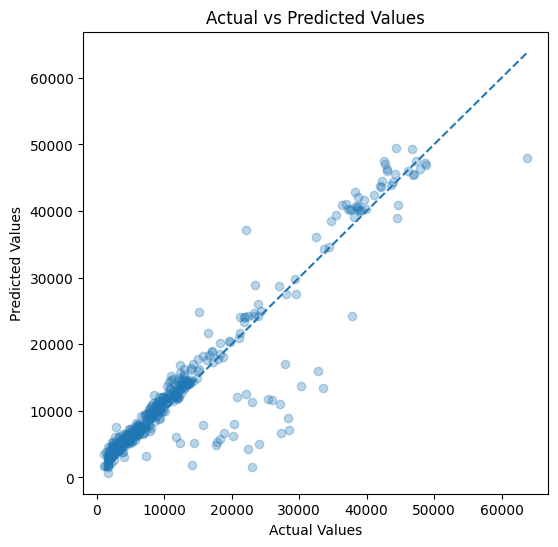

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle = '--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [10]:
learning_rate = [.01, .05, .1, .2,.8]
result = []

for lr in learning_rate:
    model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state= 42
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result.append((lr, r2_score(y_test, y_pred)))

pd.DataFrame(result, columns=['Learning rate','r2 score'])

,Learning rate,r2 score
0,0.01,0.758980
1,0.05,0.871295
2,0.10,0.867440
3,0.20,0.856919
4,0.80,0.788987


In [14]:
depth = [1,2,3,4,5,6]
relt = []
for dep in depth:
    model = GradientBoostingRegressor(
        n_estimators=100,
        max_depth=dep,
        learning_rate=0.1,
        random_state=42
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    relt.append((dep, r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))))

pd.DataFrame(relt, columns=['Depth', 'r2 score', 'mse'])

,Depth,r2 score,mse
0,1,0.765922,5858.458862
1,2,0.870692,4354.279692
2,3,0.867440,4408.692544
3,4,0.856517,4586.729983
4,5,0.849166,4702.760604
5,6,0.834086,4932.249714
